#  PREDICCIÓN DE STROKE CON MACHINE LEARNING  :

##Un enfoque moderno para reducir riesgos en salud en el 2025
##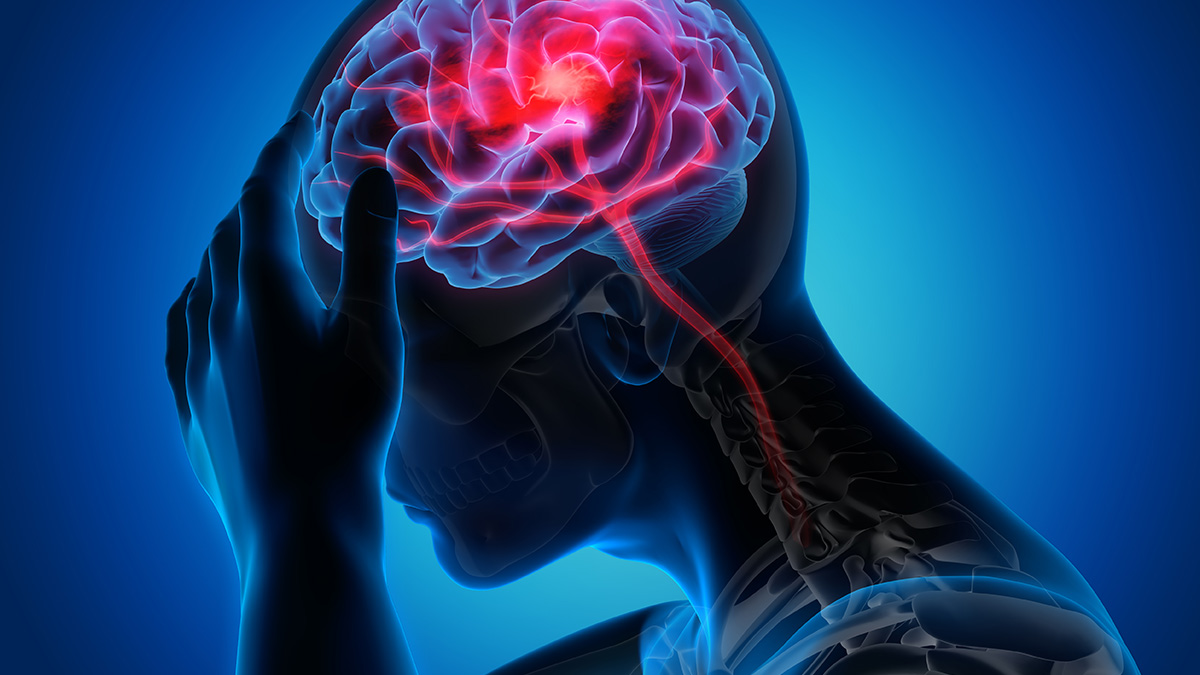

# Predicción de ACV (Accidente Cerebrovascular)

##  Resumen del problema

El accidente cerebrovascular (ACV) sigue siendo, en 2025, una de las principales causas de discapacidad y muerte a nivel mundial. Según los últimos datos publicados por organizaciones de salud internacionales, se estima que **el riesgo de sufrir un ACV ha aumentado más del 55% en los últimos 20 años**.

Actualmente, se calcula que **1 de cada 4 personas** en el mundo experimentará un ACV en algún momento de su vida.

Entre 2000 y 2024, los estudios globales indican:

-  Un aumento del **75% en la incidencia** de ACV.
-  Un incremento del **47% en las muertes** por esta causa.
-  Una **crecida del 110% en la prevalencia** de los casos.
-  Un alarmante aumento del **150% en los años de vida ajustados por discapacidad (DALY)**.

Además, se mantiene una **desigualdad profunda**: más del **85% de las muertes y el 88% de la carga de enfermedad** por ACV se concentran en países de ingresos bajos y medios, afectando especialmente a familias con recursos limitados y acceso restringido a servicios médicos preventivos.

---

##  Objetivo del proyecto

Este proyecto busca desarrollar un modelo que pueda **predecir si un paciente está en riesgo de sufrir un ACV**. Al tratarse de un problema de clasificación, el principal enfoque estará en **maximizar la sensibilidad** o *recall*, lo cual es esencial en contextos médicos donde detectar todos los casos posibles puede marcar la diferencia.

Minimizar los **falsos negativos** es fundamental, ya que dejar de identificar un caso real puede tener consecuencias graves para la salud del paciente.

---

##  Alcance

El análisis se centrará en:

- Obtener un modelo con **alto recall**.
- Seleccionar las variables más significativas para interpretar **qué factores influyen más** en la ocurrencia de un ACV.

El objetivo no es solo obtener una buena predicción, sino también **comprender el fenómeno clínico** desde los datos.

---

##  Descripción del conjunto de datos

- **Fuente**: [Kaggle Dataset - Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)
- **Tamaño**: 5,110 registros y 12 columnas.
- **Tipo de datos**: Mezcla de variables numéricas y categóricas.

> + *Aunque el conjunto de datos fue publicado antes de 2025, sigue siendo utilizado como base por su estructura limpia y representativa del fenómeno.*

---

##  Descripción de las variables

1. **id**: Identificador único del paciente.  
2. **gender**: Género del paciente (`Male`, `Female`, `Other`).  
3. **age**: Edad.  
4. **hypertension**: `1` si el paciente tiene hipertensión, `0` si no.  
5. **heart_disease**: `1` si sufre enfermedades cardíacas, `0` si no.  
6. **ever_married**: Indica si ha estado casado/a (`Yes` o `No`).  
7. **work_type**: Tipo de empleo (`children`, `Govt_job`, `Never_worked`, `Private`, `Self-employed`).  
8. **Residence_type**: Lugar de residencia (`Urban` o `Rural`).  
9. **avg_glucose_level**: Nivel promedio de glucosa en sangre.  
10. **bmi**: Índice de masa corporal.  
11. **smoking_status**: Estado del hábito de fumar (`formerly smoked`, `never smoked`, `smokes`, `Unknown`).  
12. **stroke** (variable objetivo): `1` si ha tenido un ACV, `0` si no.

>  **Nota**: `"Unknown"` en `smoking_status` indica que no se dispone de esta información para ese paciente.

---



##  Importación de librerías

En esta sección se cargan todas las bibliotecas necesarias para el análisis, procesamiento y modelado del conjunto de datos.

In [39]:
# Primero, importamos las bibliotecas necesarias para la manipulación de datos, visualización y creación de modelos

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para mostrar todas las columnas en los DataFrames
pd.set_option('display.max_columns', None)

# Para la creación de modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

# Para métricas y funciones útiles de evaluación
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# Para balancear clases con SMOTE (Over-sampling)
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

In [40]:
#CARGA DE ARCHIVO
ruta_csv = r'C:\Users\yvale\OneDrive\Escritorio\proyecto-ciencia-datos\data\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(ruta_csv)
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##Cambio de datos

In [41]:
df['stroke'] = df['stroke'].replace({0: 'Sin ataque', 1: 'Ataque'})

In [42]:
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Sí'})

In [43]:
df['heart_disease'] = df['heart_disease'].replace({0: 'No', 1: 'Sí'})

In [44]:
df['smoking_status'] = df['smoking_status'].replace({
    'Unknown': 'Desconocido',
    'formerly smoked': 'Fumó anteriormente',
    'never smoked': 'Nunca fumó',
    'smokes': 'Fuma'
})


In [45]:
df['work_type'] = df['work_type'].replace({
    'Govt_job': 'Empleado público',
    'Never_worked': 'Nunca trabajó',
    'Private': 'Empleado privado',
    'Self-employed': 'Independiente',
    'children': 'Niño/a'
})

In [46]:
df['gender'] = df['gender'].replace({
    'Male': 'Hombre',
    'Female': 'Mujer',
    'Other': 'Otro'
})

In [47]:
# Información básica sobre el dataset
df.info()  # Información general sobre el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [48]:
# Estadísticas descriptivas del dataset
df.describe(include='all').T  # Estadísticas de todas las columnas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Mujer,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110,2,No,4612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,5110,2,No,4834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Empleado privado,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [49]:
# Eliminamos columnas innecesarias, en este caso la columna 'id'
df = df.drop(columns='id')

In [50]:
# Comprobamos cuántos valores únicos tiene cada columna
unique_counts = df.nunique()


In [51]:
#verificamos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [52]:
# Establecemos un umbral para distinguir variables continuas y categóricas
umbral = 10
cols_numericas = unique_counts[unique_counts > umbral].index.tolist()  # Variables continuas
cols_categoricas = unique_counts[unique_counts <= umbral].index.tolist()  # Variables categóricas

# Eliminamos la variable 'stroke' de las categóricas, ya que es nuestra variable objetivo
if 'stroke' in cols_categoricas:
    cols_categoricas.remove('stroke')

# Convertimos las columnas categóricas a tipo 'category'
for col in cols_categoricas:
    df[col] = df[col].astype('category')


In [53]:
# Mostramos las variables categóricas y numéricas
print(f"Variables Categóricas: {cols_categoricas}")


Variables Categóricas: ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [54]:
print(f"Variables Numéricas: {cols_numericas}")

Variables Numéricas: ['age', 'avg_glucose_level', 'bmi']


In [55]:
# Convertimos las columnas numéricas a tipo numérico
def convertir_a_numero(cols_numericas, df):
    for col_name in cols_numericas:
        df[col_name] = pd.to_numeric(df[col_name], errors='coerce')

convertir_a_numero(cols_numericas, df)

In [56]:
# Verificamos los valores faltantes en el dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

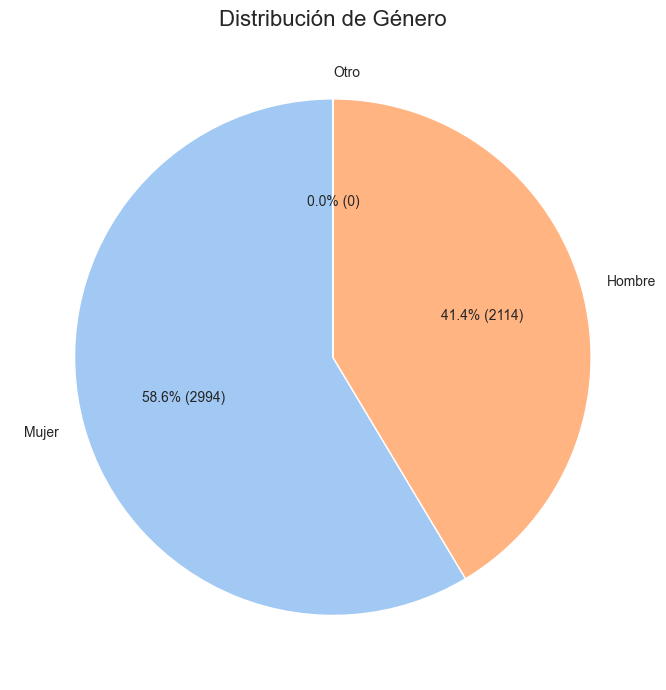

In [57]:
# Contar la frecuencia de cada categoría en la columna 'gender'
conteo_genero = df["gender"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    conteo_genero,
    autopct=lambda p: f'{p:.1f}% ({int(p/100*sum(conteo_genero))})', # Formato para mostrar porcentaje y conteo
    startangle=90,
    colors=sns.color_palette("pastel"), # Usar una paleta de colores de seaborn para un estilo más atractivo
    labels=conteo_genero.index # Usar los nombres de los géneros como etiquetas
)
plt.title("Distribución de Género", fontsize=16)
plt.ylabel('') # Eliminar la etiqueta 'y' que a veces aparece por defecto
plt.tight_layout()
plt.show()

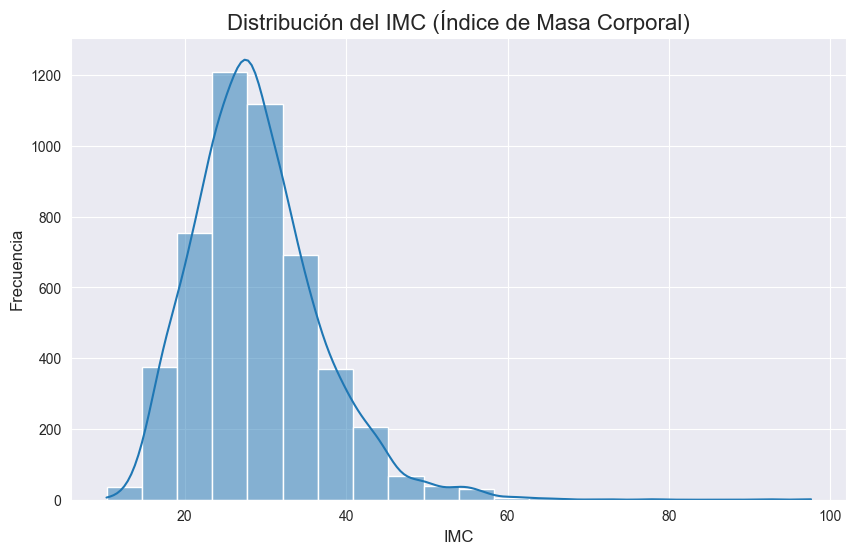

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df["bmi"], bins=20, kde=True)
plt.title("Distribución del IMC (Índice de Masa Corporal)", fontsize=16)
plt.xlabel("IMC", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()

In [59]:
# Rellenamos los valores faltantes en la columna 'bmi' con la mediana
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Verificamos si hay filas duplicadas en el dataset
df.duplicated().sum()
# Convertimos la columna 'stroke' a tipo categórico
df['stroke'] = df['stroke'].astype('category')

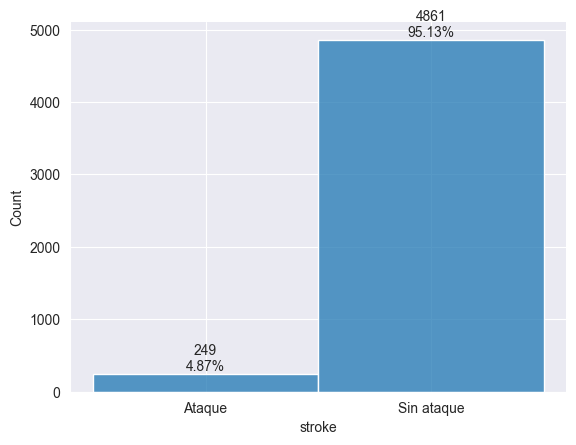

In [60]:
# Graficamos la distribución de la variable 'stroke'
sns.histplot(data=df, x='stroke')
for i, barra in enumerate(plt.gca().patches):
    conteo = barra.get_height()
    porcentaje = f'{round(conteo / df.shape[0] * 100, 2)}%'
    texto = f'{conteo}\n{porcentaje}'
    plt.gca().text(barra.get_x() + barra.get_width() / 2, barra.get_height(), texto, ha='center', va='bottom')
sns.despine()
plt.show()


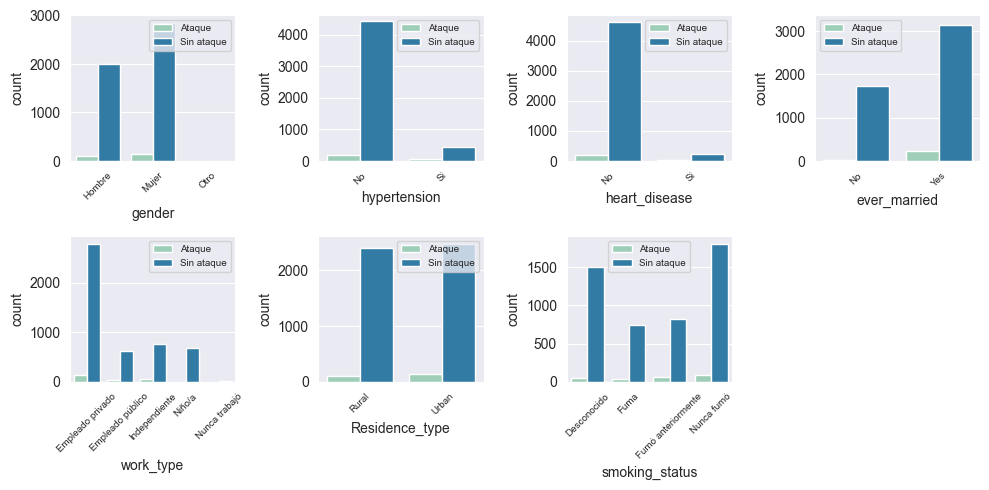

In [61]:
# Graficamos la distribución de las variables categóricas
plt.figure(figsize=(10, 5))
for idx, columna in enumerate(cols_categoricas):
    plt.subplot(2, 4, idx + 1)  # 2 filas, 4 columnas
    sns.countplot(x=columna, hue="stroke", data=df, palette='YlGnBu')
    plt.ylim(0, df[columna].value_counts().max() + 10)
    plt.xticks(fontsize=7, rotation=45)
    plt.legend(fontsize=7)

plt.tight_layout()
plt.show()

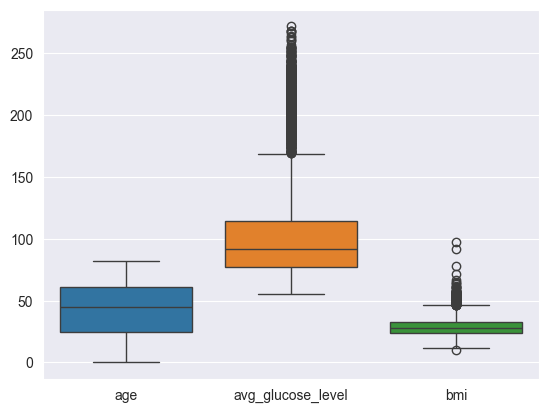

In [62]:
# Graficamos un boxplot para observar la distribución de las variables numéricas
sns.boxplot(data=df)
plt.show()

In [63]:
# Detectamos y eliminamos outliers (valores atípicos) en las variables numéricas
for var in ['avg_glucose_level', 'bmi']:
    percentil25 = df[var].quantile(0.25)
    percentil75 = df[var].quantile(0.75)
    iqr = percentil75 - percentil25
    limite_superior = percentil75 + 1.5 * iqr
    limite_inferior = percentil25 - 1.5 * iqr
    outliers = df[(df[var] > limite_superior) | (df[var] < limite_inferior)]

    # Mostramos el número de filas con outliers
    print(f"Número de filas con valores atípicos en {var}: {len(outliers)}")

Número de filas con valores atípicos en avg_glucose_level: 627
Número de filas con valores atípicos en bmi: 126


In [64]:
# Eliminamos los outliers para las variables 'avg_glucose_level' y 'bmi'
for col in ['avg_glucose_level', 'bmi']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

# Verificamos el número de filas después de eliminar outliers
print(f"Número de filas después de eliminar los valores atípicos: {df.shape[0]}")

Número de filas después de eliminar los valores atípicos: 4383


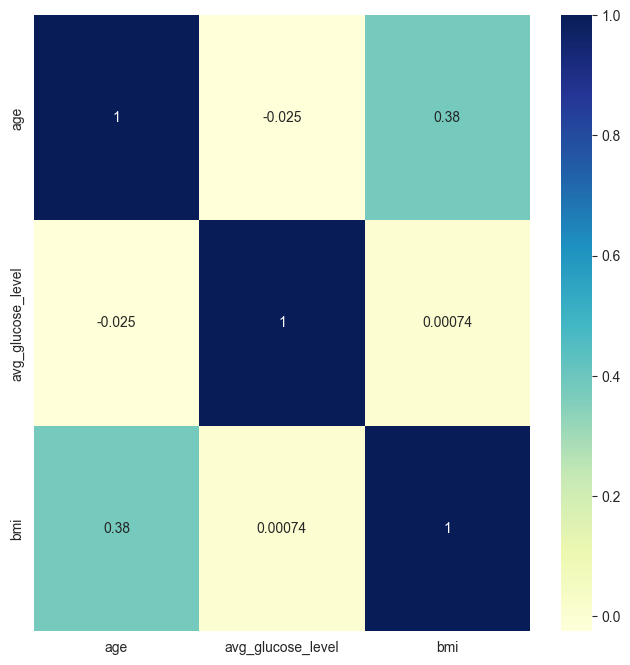

In [65]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[cols_numericas].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [66]:
# Escalamos las variables numéricas
scaler = StandardScaler().set_output(transform='pandas')
df_num = df[cols_numericas].copy()
df_num = scaler.fit_transform(df_num)

# Creamos variables dummy para las columnas categóricas
df_cat = pd.get_dummies(df[cols_categoricas], drop_first=True)

# Unimos las variables numéricas y categóricas para crear el conjunto de características
X = pd.concat([df_num, df_cat], axis=1)

# Nuestra variable objetivo es 'stroke'
y = df[['stroke']].copy()

In [67]:
# Balanceamos las clases utilizando SMOTE
over = SMOTE(sampling_strategy=1)
X_smote, y_smote = over.fit_resample(X, y)

In [68]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)

### Distribución de la variable 'stroke' antes del balanceo (Original)

Este gráfico muestra el conteo de cada clase en la variable 'stroke' antes de aplicar cualquier técnica de balanceo. Es común observar un desequilibrio significativo entre las clases, lo que puede afectar el rendimiento de los modelos de Machine Learning.

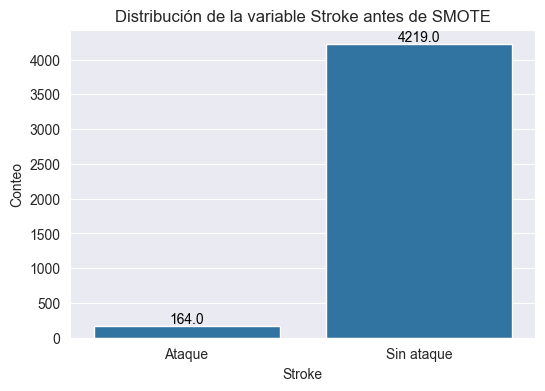

In [69]:
# Gráfico de la distribución de 'stroke' antes de balancear los datos
plt.figure(figsize=(6, 4))
sns.countplot(x=y['stroke'])
plt.title('Distribución de la variable Stroke antes de SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Conteo')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

### Distribución de la variable 'stroke' después del balanceo (Con SMOTE)

El conjunto de datos original, que contenía 5110 registros, fue sometido a un proceso de limpieza inicial que incluyó la eliminación de valores atípicos en variables como avg_glucose_level y bmi. Esta depuración resultó que tras aplicar la técnica SMOTE para balancear la variable objetivo ‘stroke’, ambas clases quedaron con 4219 instancias cada una, dando un total de 8438 registros en el dataset balanceado.
Este equilibrio entre clases es esencial para evitar sesgos del modelo hacia la clase mayoritaria y garantizar que los algoritmos de Machine Learning aprendan a predecir con precisión tanto los casos de ACV como los de no-ACV.

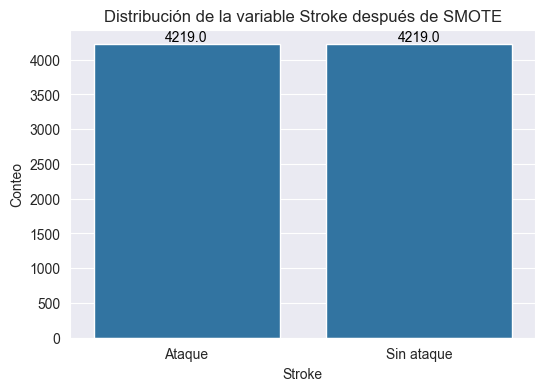

In [70]:
# Gráfico de la distribución de 'stroke' después de balancear los datos con SMOTE

plt.figure(figsize=(6, 4))
sns.countplot(x=y_smote['stroke'])
plt.title('Distribución de la variable Stroke después de SMOTE')
plt.xlabel('Stroke')
plt.ylabel('Conteo')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.show()

### Conclusión: MODELO
Para finalizar nuestro análisis y resumir los hallazgos clave del mejor modelo (Random Forest optimizado), visualizamos las características que tuvieron el mayor impacto en sus predicciones.

In [71]:
# Función para obtener las métricas del modelo
def obtener_metricas_modelo(nombre_modelo:str, predicciones, y_test_data, auc):
    tabla = pd.DataFrame(columns=['Modelo', 'Precisión', 'Recall', 'F1 Score', 'Exactitud', 'AUC'])
    tabla.loc[0] = {
        'Modelo': nombre_modelo,
        'Precisión': precision_score(y_test_data, predicciones),
        'Recall': recall_score(y_test_data, predicciones),
        'F1 Score': f1_score(y_test_data, predicciones),
        'Exactitud': accuracy_score(y_test_data, predicciones),
        'AUC': auc
    }
    return tabla

In [72]:
# Creamos los modelos y sus métricas
modelos = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True),
          GaussianNB(),
          RandomForestClassifier()]

modelos_metricas = {}

# Convert y_train and y_test to numerical for model fitting and metric calculation
# Map 'Sin ataque' to 0 and 'Ataque' to 1
y_train_numeric = y_train['stroke'].map({'Sin ataque': 0, 'Ataque': 1})
y_test_numeric = y_test['stroke'].map({'Sin ataque': 0, 'Ataque': 1})

# Define target names for classification_report
target_names = ['Sin ataque', 'Ataque']

for mdl in modelos:
    # Fit the model with numerical y_train
    modelo = mdl.fit(X_train, y_train_numeric)
    nombre_modelo = modelo.__class__.__name__
    # y_pred will now be numerical (0 or 1) because the model was trained on numerical labels
    y_pred = modelo.predict(X_test)

    # Use numerical y_test_numeric and y_pred for classification_report and metric calculations
    informe = classification_report(y_test_numeric, y_pred, target_names=target_names)

    # Calculamos ROC y AUC using numerical y_test_numeric
    probabilidades = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_numeric, probabilidades)
    auc = roc_auc_score(y_test_numeric, probabilidades)
    metricas = obtener_metricas_modelo(nombre_modelo, y_pred, y_test_numeric, auc)

    modelos_metricas[nombre_modelo] = [modelo, y_pred, informe, fpr, tpr, auc, metricas]

In [73]:
# Mostramos los informes de los modelos
for key, value in modelos_metricas.items():
    print(f"Informe para el modelo {key}:")
    print(value[2])

# Unimos todas las métricas de prueba en un solo DataFrame
metricas_finales = pd.concat([modelos_metricas[x][6] for x in modelos_metricas.keys()])
metricas_finales.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

Informe para el modelo LogisticRegression:
              precision    recall  f1-score   support

  Sin ataque       0.83      0.77      0.80      1054
      Ataque       0.78      0.84      0.81      1056

    accuracy                           0.80      2110
   macro avg       0.81      0.80      0.80      2110
weighted avg       0.81      0.80      0.80      2110

Informe para el modelo DecisionTreeClassifier:
              precision    recall  f1-score   support

  Sin ataque       0.93      0.89      0.91      1054
      Ataque       0.90      0.93      0.91      1056

    accuracy                           0.91      2110
   macro avg       0.91      0.91      0.91      2110
weighted avg       0.91      0.91      0.91      2110

Informe para el modelo SVC:
              precision    recall  f1-score   support

  Sin ataque       0.96      0.81      0.88      1054
      Ataque       0.83      0.97      0.90      1056

    accuracy                           0.89      2110
   macro a

,Modelo,Precisión,Recall,F1 Score,Exactitud,AUC
0,RandomForestClassifier,0.926288,0.987689,0.956004,0.954502,0.993592
1,DecisionTreeClassifier,0.895359,0.931818,0.913225,0.911374,0.911355
2,SVC,0.834697,0.965909,0.895522,0.887204,0.945143
3,LogisticRegression,0.782570,0.841856,0.811131,0.803791,0.874829
4,GaussianNB,0.599200,0.992424,0.747237,0.663981,0.832006


In [ ]:
# Definir la cuadrícula de parámetros para GridSearchCV
param_grid = {
    'n_estimators': [300, 500], # Número de árboles en el bosque
    'max_depth': [3, 5, None], # Profundidad máxima de los árboles (None significa sin límite)
    'min_samples_split': [2, 3, 4], # Mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4] # Mínimo de muestras requeridas en un nodo hoja
}

# Inicializar RandomForestClassifier con un estado aleatorio para reproducibilidad
rfc = RandomForestClassifier(random_state=42)

# Realizar búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5, # Usar 5-fold cross-validation
    scoring='f1', # Usar F1-score como métrica principal para evaluación
    n_jobs=-1, # Utilizar todos los núcleos disponibles del procesador
    verbose=1 # Mostrar información detallada durante la ejecución
)

# Ejecutar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, y_train_numeric)

# Obtener los mejores parámetros encontrados por GridSearchCV
best_params = grid_search.best_params_

# Imprimir los mejores parámetros
print("Mejores parámetros:", best_params)

# Entrenar el modelo final de Random Forest con los mejores parámetros encontrados
best_rf_model = RandomForestClassifier(**best_params, random_state=42) # Se pasa el diccionario de parámetros
best_rf_model.fit(X_train, y_train_numeric)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


<Figure size 800x600 with 0 Axes>

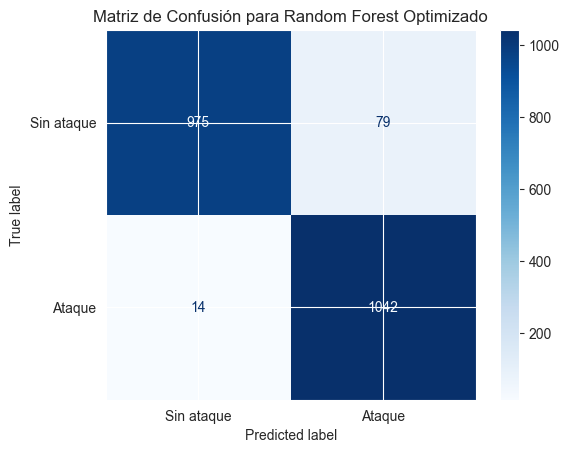


Informe de Clasificación para Random Forest Optimizado:
              precision    recall  f1-score   support

  Sin ataque       0.99      0.93      0.95      1054
      Ataque       0.93      0.99      0.96      1056

    accuracy                           0.96      2110
   macro avg       0.96      0.96      0.96      2110
weighted avg       0.96      0.96      0.96      2110



In [99]:
# Predecir en el conjunto de prueba con el modelo optimizado
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Generar la matriz de confusión
cm_rf_optimized = confusion_matrix(y_test_numeric, y_pred_rf_optimized, labels=[0, 1])
disp_rf_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_rf_optimized, display_labels=['Sin ataque', 'Ataque'])

plt.figure(figsize=(8, 6))
disp_rf_optimized.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión para Random Forest Optimizado')
plt.show()

# Mostrar el informe de clasificación
print("\nInforme de Clasificación para Random Forest Optimizado:")
print(classification_report(y_test_numeric, y_pred_rf_optimized, target_names=target_names))


In [58]:
import os
import pandas as pd

# Asegurar que existe la carpeta data
os.makedirs("data", exist_ok=True)
print("✔ Dataset limpio exportado: data/stroke_clean.csv")


✔ Dataset limpio exportado: data/stroke_clean.csv
